<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/TareaRegresionClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=12cYJdWfM_vj2K8UwpV4vcy54BUIXLn7v" alt="d" width="950">

- **No olvidar hacer una copia a este Colab.**
- En este notebook se encuentran dos ejercicios uno para Regresion y otro de clasificación.
- La fecha límite de entrega es hasta el martes  02/04/2024.
- El pipeline recomendado a seguir para cada ejercicio es el que vieron en la primera clase:

    - Paso 1: Definición del problema
    - Paso 2: Recopilación de datos
    - Paso 3: Análisis de datos exploratorios (EDA)
    - Paso 4: Ingeniería de características
    - Paso 5: división de entrenamiento/prueba
    - Paso 6: Definición de métricas de evaluación del modelo
    - Paso 7: Selección, entrenamiento, predicción y evaluación del modelo
    - Paso 8: Ajuste de hiperparámetros/Mejora del modelo

# Rendimiento de cultivos agrícolas (Regresión)

### ***1. Definición del problema:***

 Nuestro objetivo es obtener información que los agricultores y otras partes interesadas agrícolas puedan utilizar para tomar decisiones informadas mediante el uso de modelos de aprendizaje automático para predecir el rendimiento de los cultivos.

### ***2. Recopilación de datos:***

Para esto usaremos el conjunto de datos [Agricultural Crop Yield in Indian States Dataset](https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset/data) que contiene:

- Crop: The name of the crop cultivated.
Crop_Year: The year in which the crop was grown.
- Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
- State: The Indian state where the crop was cultivated.
- Area: The total land area (in hectares) under cultivation for the specific crop.
- Production: The quantity of crop production (in metric tons).
Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
- Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
- Pesticide: The total amount of pesticide used for the crop (in kilograms).                              - Yield: The calculated crop yield (production per unit area).

Link para descargar el dataset:
https://drive.google.com/file/d/1k-xuuDizjLX4WJGOas-of52DEj2aoLyv/view?usp=sharing

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
ruta='/content/drive/MyDrive/MAESTRIA CIENCIA DE DATOS UCSP/MACHINE LEARNING Y DEEP LEARNING/crop_yield.csv'

In [114]:
df = pd.read_csv(ruta)

### ***3. Análisis de datos exploratorios (EDA):***

Una vez descargado el dataset. Lee el archivo csv en un dataframe de Pandas y realiza una exploración de los datos. Verifica que no hayan datos faltantes.

In [115]:
df.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498099e+00,1997.00,2004.00,2010.00,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9317.00,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,13804.00,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.70,1247.60,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1234957.44,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2421.90,2.004170e+04,1.575051e+07
Yield,19689.0,7.995401e+01,8.783062e+02,0.00,0.60,1.03,2.388889e+00,2.110500e+04


In [118]:
df.isna().sum()#todos los valores se encuentran completos

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [119]:
#Analizamos las correlaciones entre las variables
#Se observa que nuestra variable objetivo Yield tiene mayor correlación con Production y Annual_Rainfall
#sin embargo utilizaremos todas las variables en el modelo
df.corr()

<ipython-input-119-438d05c3c14b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000



### ***4: Ingeniería de características:***

Puedes decartar algunas columnas que no sean necesarias, realizar un ecoding y escalar los datos.

Como puedes haber notado hay columnas que son strings en el dataset que en realidad son categorias/clases en esa columna. Para poder usar esa información necesitamos codificarlas mediante variables numéricas que codificaran la información categórica. Eso podemos hacerlo mediante "one-hot encoding" o "dummy-encoding".

Pandas ya tiene implementado dummy encoding. En una variable dummy:

- Un 1 codifica la presencia de una categoría.
- Un 0 codifica la ausencia de una categoría.

Se puede observar en la figura como funciona dummy encoding con una columna que tiene dos categorias:




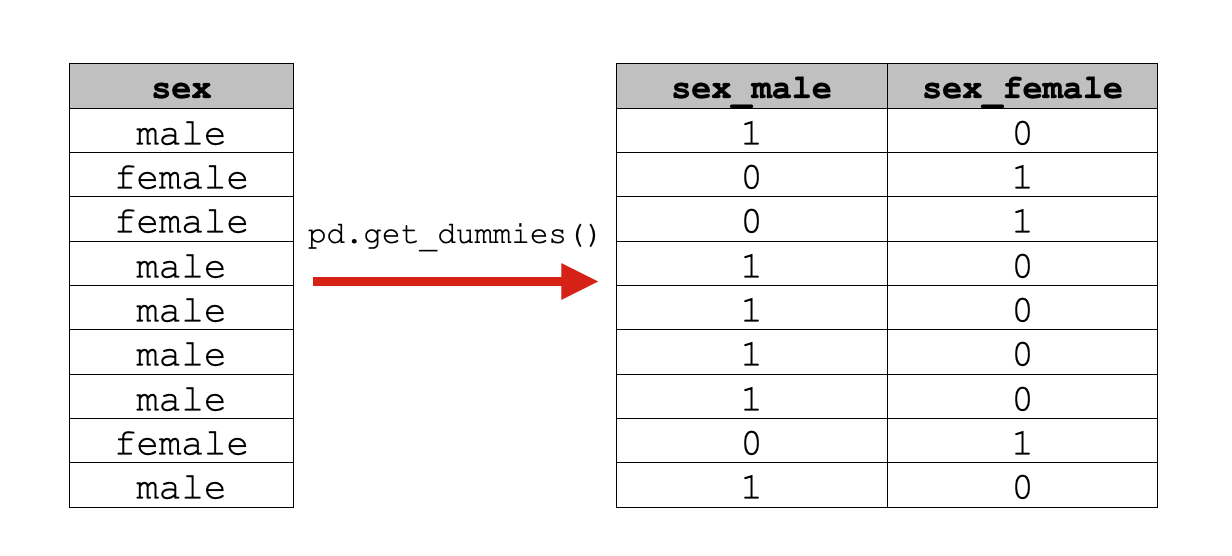

In [120]:
# Con este codigo podemos ver que columnas son categoricas
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [121]:
# Dummy encoding
df1 = pd.get_dummies(df, columns = category_columns, drop_first=True)
df1.shape

(19689, 95)

In [122]:
df1.head(10)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,13587.0,9073,2051.4,1293074.79,4211.97,0.643636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1997,2979.0,1507,2051.4,283511.43,923.49,0.465455,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,94520.0,904095,2051.4,8995468.40,29301.20,9.919565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1997,10098.0,5158,2051.4,961026.66,3130.38,0.461364,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1997,19216.0,14721,2051.4,1828786.72,5956.96,0.615652,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Verificamos outliers aplicando el método IQR, se analiza si hay valores fuera de los límites IQR.
numerical_features = ["Area", "Production", "Annual_Rainfall",'Fertilizer','Pesticide','Yield']
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Area               True
Production         True
Annual_Rainfall    True
Fertilizer         True
Pesticide          True
Yield              True
dtype: bool

<Axes: >

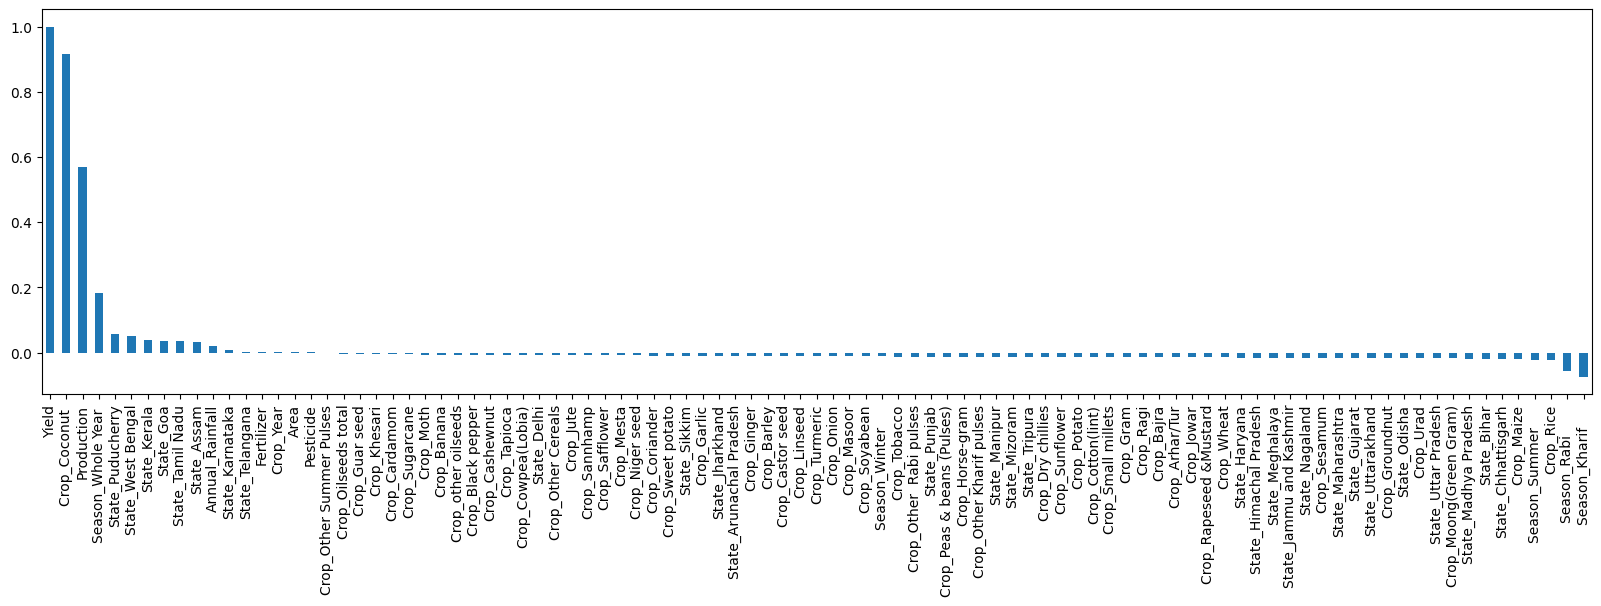

In [124]:
plt.figure(figsize=(16,10))
df1.corr()['Yield'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))


In [125]:
correlations = df1.corr()['Yield'].sort_values(ascending=False)
correlations

Yield                 1.000000
Crop_Coconut          0.916236
Production            0.570809
Season_Whole Year     0.182928
State_Puducherry      0.056964
                        ...   
Crop_Maize           -0.019888
Season_Summer        -0.022273
Crop_Rice            -0.022519
Season_Rabi          -0.056959
Season_Kharif        -0.074770
Name: Yield, Length: 95, dtype: float64

In [126]:
#Según la correlación observada se puede eliminar State_Telangana,Fertilizer,Crop_Year,Area,Pesticide y crop_other summer pulse

In [127]:
df1.drop(columns=['State_Telangana','Fertilizer','Crop_Year','Area','Pesticide' ,'Crop_Other Summer Pulses'], inplace=True)

In [128]:
df1.head(5)

,Production,Annual_Rainfall,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,...,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,56708,2051.4,0.796087,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4685,2051.4,0.710435,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,2051.4,0.238333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,126905000,2051.4,5238.051739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,794,2051.4,0.420909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Realiza un escalamiento en las columnas en caso sea necesario

In [129]:
#Escalamos las dos variables Production y Annual_Rainfall
# Min-Max-Scaling para columnas.

from sklearn.preprocessing import MinMaxScaler

features_mms = ['Production','Annual_Rainfall']
df_features_mms = pd.DataFrame(df1, columns=features_mms)
df_remaining_features = df1.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df2 = pd.concat([df_remaining_features, df_rescaled_features], axis=1)


In [130]:
df2.head(5)

,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,Crop_Coconut,...,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Production,Annual_Rainfall
0,0.796087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.964274e-06,0.279953
1,0.710435,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.405944e-07,0.279953
2,0.238333,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3.477711e-09,0.279953
3,5238.051739,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2.006086e-02,0.279953
4,0.420909,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.255138e-07,0.279953


In [131]:
df2.shape

(19689, 89)

### ***5. División de entrenamiento/prueba:***

Realiza la división de la data en tres conjuntos: Train (60 %), Test (20 %). Usa  `random_state = 10` al llamar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html )

In [132]:
from sklearn.model_selection import train_test_split

X1 = df2.drop('Yield', axis=1)
X = X1.values
y = df['Yield'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6, test_size=0.2, random_state=10)

In [133]:
X_train.shape

(11813, 88)

In [134]:
y_train.shape

(11813,)

In [135]:
X_test.shape

(3938, 88)

In [136]:
y_test.shape

(3938,)

### ***6. Métricas de evaluación del modelo:***



Para cuantificar la precisión predictiva en un regresor, encontramos el error de predicción, es decir, qué tan lejos están las predicciones de nuestro modelo del valor real. Para eso existen diferentes metricas:

- ***Mean Squared Error*** (Error Cuadratico Medio): MSE es una medida de la diferencia promedio entre el valor previsto y el valor real, nos da un valor positivo en unidades cuadradas y entre más cercano sea a cero es mejor.

$$ MSE = \frac{1}{\text{# total data points}}\sum_{\text{all data points}}(\text{predicted value} - \text{actual value})^2$$


- ***Root Mean Squared Error*** : la raiz cuadrada del MSE, MSE nos da el resultado en unidades cuadradas, para poder interpretarlo más fácilmente sacamos la raíz cuadrada y de esta manera tenemos el valor en las unidades originales.

- ***Mean absolute error*** Error absoluto medio (MAE), diferencia promedio entre dos valores, es decir, nos permite saber que tan diferente es el valor predicho y el valor real u observado.

- ***Coeficiente de Determinación $R^2$ *** Es un tipo diferente de métrica de regresión que mide qué tan bien el modelo explica la variación en los datos. R2 se calcula comparando la variación de los valores previstos con la variación de los valores reales. R2 varía de 0 a 1, y los valores más altos indican un mejor rendimiento. R2 es útil cuando se desea evaluar qué parte de la variabilidad de los datos captura el modelo, pero no indica la magnitud o dirección de los errores.


Puedes encontrar mas información de métricas para regresión en este [blog](https://medium.com/@nicolasarrioja/m%C3%A9tricas-en-regresi%C3%B3n-5e5d4259430b).

Todas estas métricas y otras más ya esta implementadas en SkLearn, puedes observarlas [aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).


Para este ejercicio usaremos una métrica común en regresión:  RMSE . Sin embargo, puedes explorar otras métricas.


### ***7. Selección, entrenamiento, predicción y evaluación del modelo***

Entrena diferentes modelos de Machine Learning con ayuda de Scikit-Learn, prueba con:(Ver ejemplos)

- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
-[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

Tambie puedes probar con otros modelos de regresión.

#LinearRegression#

In [137]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)

y_hat = reg.predict(X_train)

In [138]:
from sklearn import metrics

In [139]:
print('MAE:', metrics.mean_absolute_error(y_train,y_hat ))
print('MSE:', metrics.mean_squared_error(y_train, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_hat)))

MAE: 57.97833792344703
MSE: 119759.52436638004
RMSE: 346.0628907675309


In [141]:
from sklearn.metrics import r2_score
r2_score(y_train, y_hat)

0.8394458461653282

#SGDRegressor#

In [145]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor(max_iter=100)
sgdr.fit(X_train,y_train)
sgdPred=sgdr.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [146]:
print('MAE:', metrics.mean_absolute_error(y_train, sgdPred))
print('MSE:', metrics.mean_squared_error(y_train, sgdPred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, sgdPred)))

MAE: 63.90404116107342
MSE: 124436.25698037837
RMSE: 352.7552366448702


In [147]:
r2_score(y_train, sgdPred)

0.8331760413082684

#DecisionTreeRegressor#

In [163]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 10, random_state=0)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [164]:
dt_pred = dt_reg.predict(X_train)

In [165]:
print('MAE:', metrics.mean_absolute_error(y_train, dt_pred))
print('MSE:', metrics.mean_squared_error(y_train, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, dt_pred)))

MAE: 3.529597184558063
MSE: 4145.233824244752
RMSE: 64.38349030803434


In [155]:
r2_score(y_train,dt_pred )

0.9999662316604639

#RandomForestRegressor#

In [156]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_pred = rf_reg.predict(X_train)

In [157]:
print('MAE:', metrics.mean_absolute_error(y_train, rf_pred))
print('MSE:', metrics.mean_squared_error(y_train, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,rf_pred)))

MAE: 11.187651238822879
MSE: 16711.355345951994
RMSE: 129.27240751974875


In [158]:
r2_score(y_train,rf_pred)

0.9775961241396425

#GradientBoostingRegressor#

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 100, random_state = 0)
gb_reg.fit(X_train,y_train)
gb_pred= gb_reg.predict(X_train)

In [161]:
print('MAE:', metrics.mean_absolute_error(y_train, gb_pred))
print('MSE:', metrics.mean_squared_error(y_train, gb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,gb_pred)))

MAE: 6.69812052923848
MSE: 4030.9748226927177
RMSE: 63.48995843984085


In [162]:
r2_score(y_train,gb_pred)

0.9945959224937605

***8. Ajuste de hiperparámetros/Mejora del modelo***

Usa [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para ajustar los hiperparametros. GridSeacrhCV usa Cross-Validation, entonces por dentro define diferentes conjuntos de validacion, por lo que debemos pasarle nuestro conjunto de entrenamiento *train* completo.

Recuerda evaluar el desempeño de los modelos entrenados en el conjunto de validación, usaremos una métrica común en regresión: $RMSE$. Para eso usa como parametro `scoring = 'neg_root_mean_squared_error'`al momento de llamar a GridSearchCV. Recuerda multiplicar por -1 al momento de ver el score y así eliminar la parte negativa. Por ejemplo para  encontrar los hiperparametros para GradientBoosting sería así:



```
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 4,scoring = 'neg_root_mean_squared_error' , n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n", -1 * grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
```



    



In [171]:
from sklearn.model_selection import GridSearchCV

In [178]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 4,scoring = 'neg_root_mean_squared_error' , n_jobs=-1)
grid_GBR.fit(X_train, y_train)

KeyboardInterrupt: 

In [177]:
grid_GBR.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid_GBR.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

GBR = GradientBoostingRegressor()


rnd_search = RandomizedSearchCV(estimator=GBR, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=100)
rnd_search.fit(X_train, y_train)

### Responda las siguientes preguntas:

- **Pregunta:**  ¿ Cual fue el RMSE para cada modelo?


In [166]:
#LinearRegression          RMSE 346.0628907675309
#SGDRegressor              RMSE 352.8868329813362
#DecisionTreeRegressor     RMSE 64.38349030803434
#RandomForestRegressor     RMSE 129.27240751974875
#GradientBoostingRegressor RMSE  63.48995843984085

- **Pregunta:**  ¿Qué modelo obtuvo menor RMSE?

In [ ]:
#El modelo con menor RMSE fue el GradientBoostingRegressor

- **Pregunta:** Evalúa el desempeño del mejor modelo en el conjunto de test.

In [180]:
gb_pred_test= gb_reg.predict(X_test)

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test,gb_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, gb_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,gb_pred_test)))

MAE: 12.844096308964762
MSE: 28004.265372759917
RMSE: 167.34475006034674




---



# Riesgo de enfermedad cardiovascular en adultos (Clasificación)

Encontrar un modelo con el cual se pueda saber si una persona tiene riesgo de padecer una enfermedad cardiovascular o no.

El [conjunto de datos](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data) que nos ayudará contiene información detallada sobre los factores de riesgo de enfermedad cardiovascular. Incluye información sobre edad, sexo, altura, peso, valores de presión arterial, niveles de colesterol, niveles de glucosa, hábitos de tabaquismo y consumo de alcohol de más de 70 mil personas. Además, describe si la persona es activa o no y si tiene alguna enfermedad cardiovascular.

Link para descargar dataset: https://drive.google.com/file/d/13-Ao93ilWG-hMGhpo8A3Vvm4IVP-lSmh/view?usp=sharing

Información del dataset: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data

Usa el mismo pipeline de Regresion.

Se puede intentar con los siguientes modelos:
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Support Vector Machine ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



In [4]:
ruta_1='/content/drive/MyDrive/MAESTRIA CIENCIA DE DATOS UCSP/MACHINE LEARNING Y DEEP LEARNING/heart_data.csv'

In [5]:
dfc = pd.read_csv(ruta_1)

In [6]:
dfc.head(10)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


### ***3. Análisis de datos exploratorios (EDA):***

In [7]:
dfc.shape

(70000, 14)

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [9]:
dfc.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dfc.isna().sum()#no se tiene valores faltantes

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<ipython-input-11-051d056c2172>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dfc['cardio'], palette="Blues", linewidth=1)


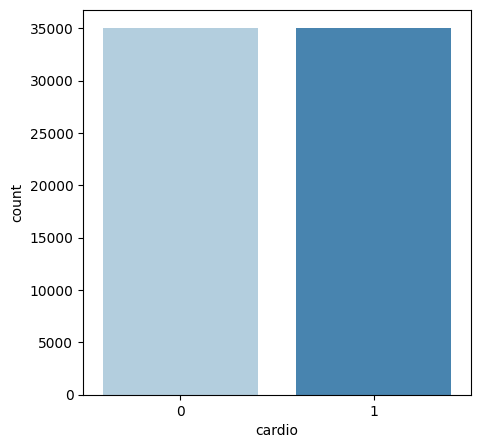

In [11]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=dfc['cardio'], palette="Blues", linewidth=1)
plt.show()


In [12]:
dfc.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
# Verifica outliers aplicando el método IQR, se analiza si hay valores fuero de los límites IQR.
numerical_featuresc = ["height", "weight", "ap_hi",'ap_lo','cholesterol','gluc']
df_numc = dfc[numerical_featuresc]
df_numc.describe()

Q1 = df_numc.quantile(0.25)
Q3 = df_numc.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_numc < (Q1 - 1.5 * IQR)) | (df_numc > (Q3 + 1.5 * IQR))).any()

height          True
weight          True
ap_hi           True
ap_lo           True
cholesterol    False
gluc            True
dtype: bool

In [14]:
correlationsc = dfc.corr()['cardio'].sort_values(ascending=False)
correlationsc

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
index          0.003800
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

<Axes: >

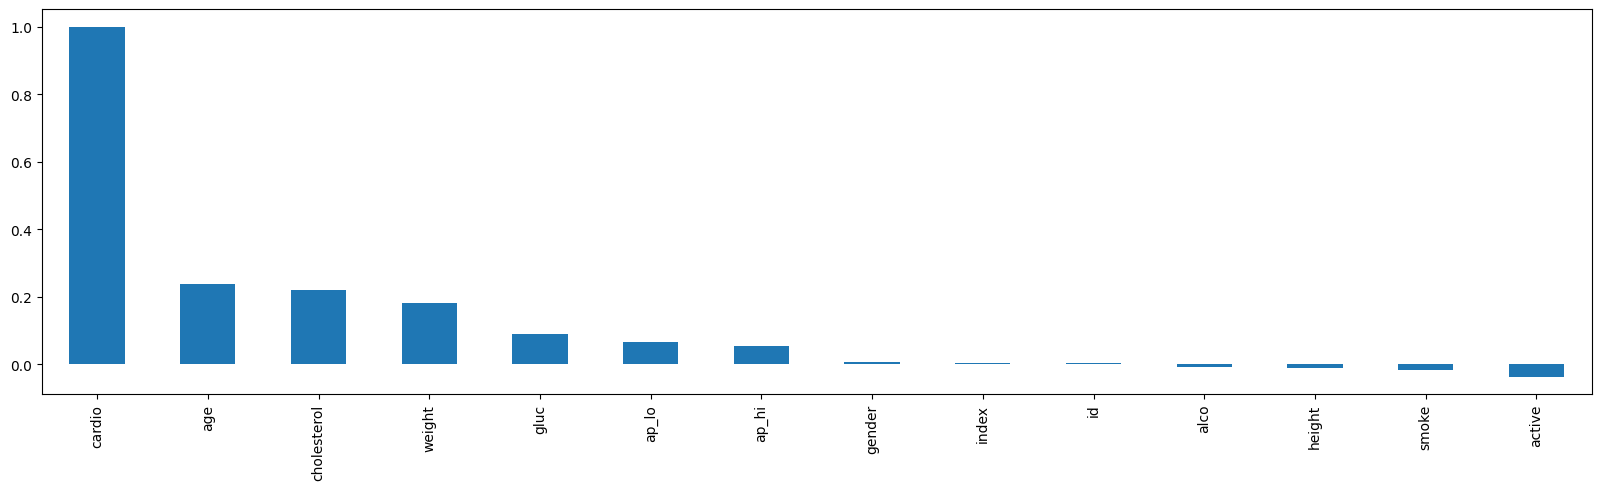

In [15]:
plt.figure(figsize=(16,10))
dfc.corr()['cardio'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

### ***4: Ingeniería de características:***

In [17]:
dfc.drop(columns=['index','id','gender'], inplace=True)#Eliminamos también el genero por tener baja correlación
#con la variable objetivo

In [18]:
dfc

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,168,62.0,110,80,1,1,0,0,1,0
1,20228,156,85.0,140,90,3,1,0,0,1,1
2,18857,165,64.0,130,70,3,1,0,0,0,1
3,17623,169,82.0,150,100,1,1,0,0,1,1
4,17474,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,168,76.0,120,80,1,1,1,0,1,0
69996,22601,158,126.0,140,90,2,2,0,0,1,1
69997,19066,183,105.0,180,90,3,1,0,1,0,1
69998,22431,163,72.0,135,80,1,2,0,0,0,1


In [19]:
#Escalamos las dos variables Production y Annual_Rainfall
# Min-Max-Scaling para columnas.

from sklearn.preprocessing import MinMaxScaler

features_mms = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']

df_features_mms = pd.DataFrame(dfc, columns=features_mms)
df_remaining_features = dfc.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df1c = pd.concat([df_remaining_features, df_rescaled_features], axis=1)




In [20]:
df1c.head(5)

,smoke,alco,active,cardio,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,0,0,1,0,0.588076,0.579487,0.273684,0.016079,0.013550,0.0,0.0
1,0,0,1,1,0.730159,0.517949,0.394737,0.017934,0.014453,1.0,0.0
2,0,0,0,1,0.624003,0.564103,0.284211,0.017316,0.012647,1.0,0.0
3,0,0,1,1,0.528455,0.584615,0.378947,0.018553,0.015357,0.0,0.0
4,0,0,0,0,0.516918,0.517949,0.242105,0.015461,0.011743,0.0,0.0


### ***5. División de entrenamiento/prueba:***

In [26]:
from sklearn.model_selection import train_test_split

X1 = df1c.drop('cardio', axis=1)
X = X1.values
y = df1c['cardio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6, test_size=0.2, random_state=10)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
#plot_confusion_matrix,


In [37]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### ***Paso 6: Métricas de evaluación del modelo :***

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
#plot_confusion_matrix,

In [60]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
# Función que muestra la curva ROC y su AUC
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [63]:
# Muestra la curva precision-recall, el F1 score y AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In [75]:
# Función que muestra la matriz de confusión para un clasificador y el accuracy en entrenamiento y prueba
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    #plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No cardio", "cardio"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No cardio", "cardio"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    #plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No cardio", "cardio"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

#Logistic Regression#

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

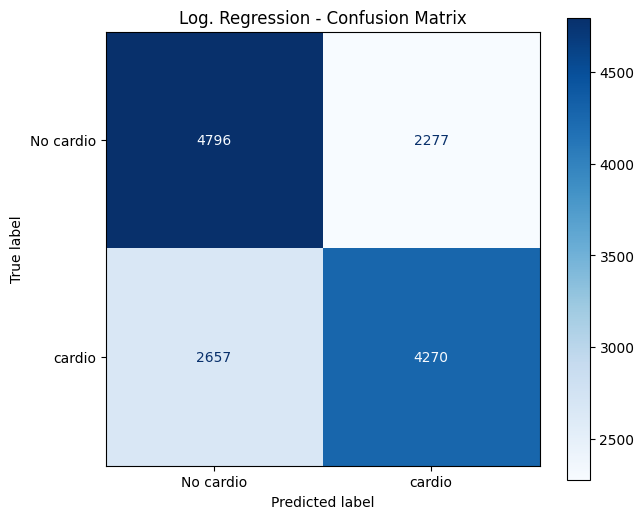

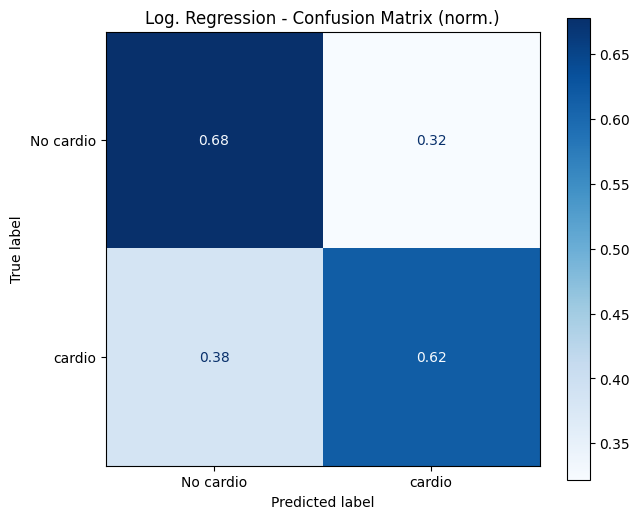

Accuracy Score Test: 0.6475714285714286
Accuracy Score Train: 0.6466904761904761 (as comparison)



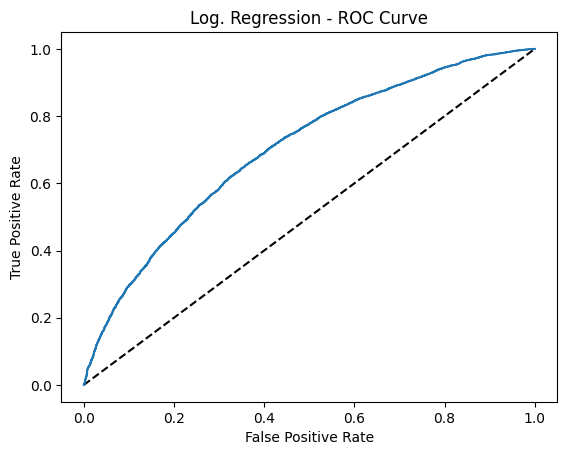

AUC Score (ROC): 0.7007422705216246



In [77]:
# Visualizar evaluaciones del modelo.
#feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
#precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

#Decision Tree Classifier#

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [103]:
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)

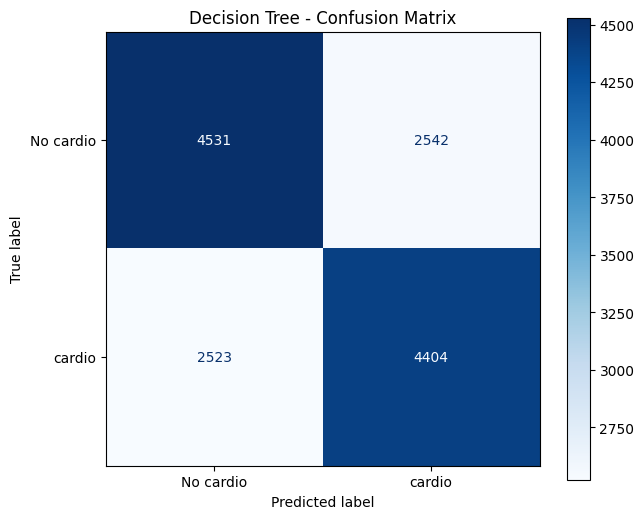

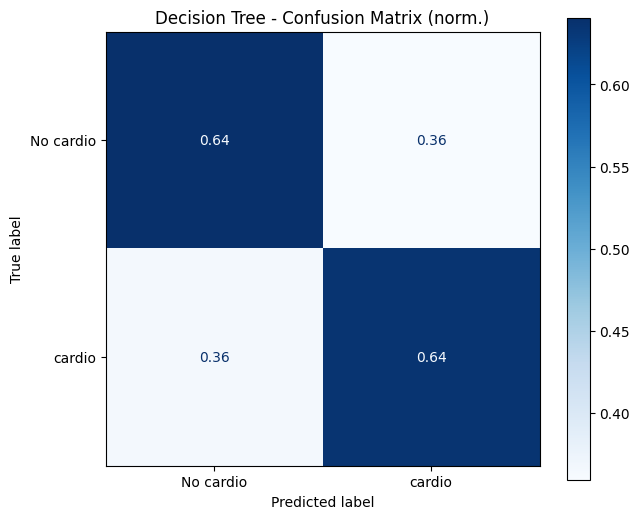

Accuracy Score Test: 0.6382142857142857
Accuracy Score Train: 0.9998571428571429 (as comparison)



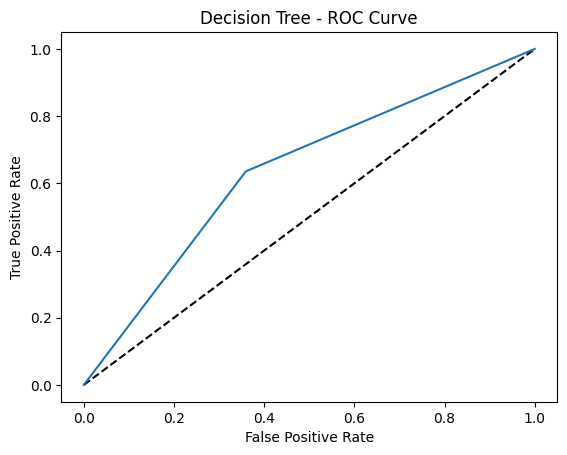

AUC Score (ROC): 0.6381375945967676



In [104]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, dt, y_pred_dt, 'Decision Tree')
roc_curve_auc_score(X_test, y_test, y_pred_dt_prob, 'Decision Tree')

#Random Forest Classifier#

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

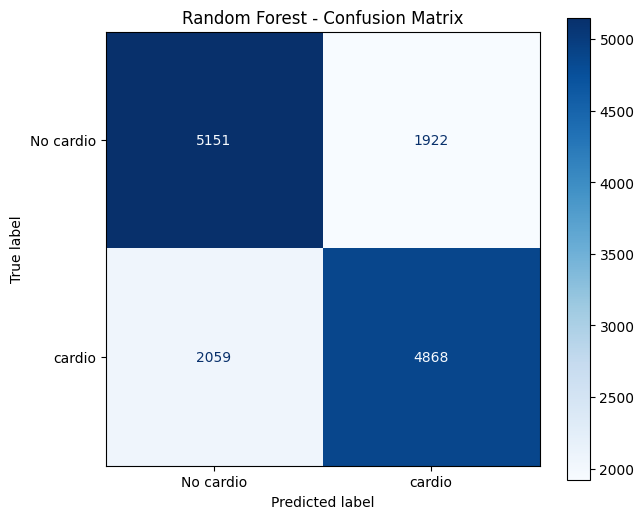

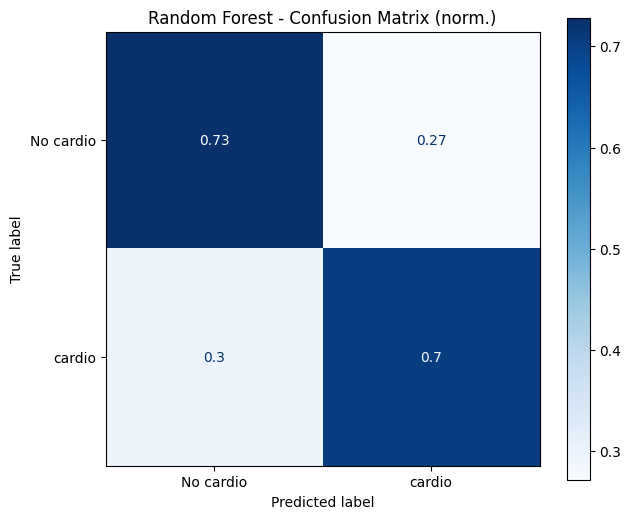

Accuracy Score Test: 0.7156428571428571
Accuracy Score Train: 0.9998571428571429 (as comparison)



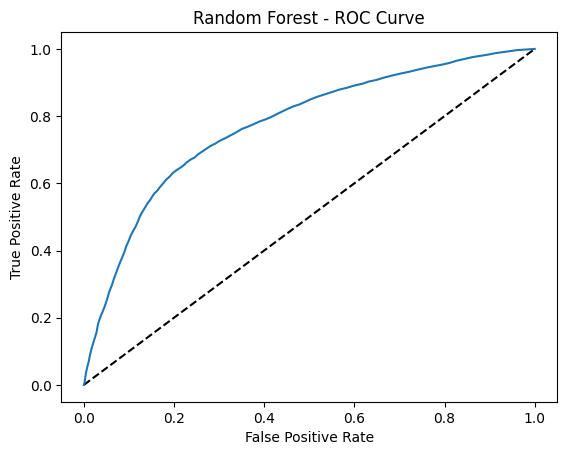

AUC Score (ROC): 0.7734171334674336



In [83]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')

#Gradient Boosting Classifier#

In [89]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
 max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [93]:
y_pred_clf = clf.predict(X_test)
y_pred_clf_prob = clf.predict_proba(X_test)

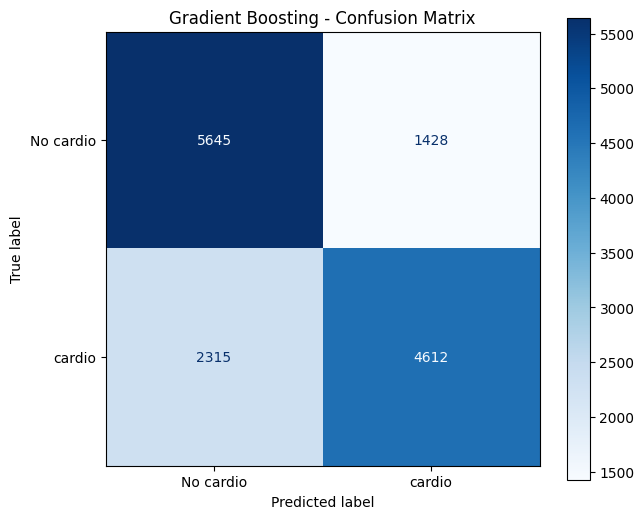

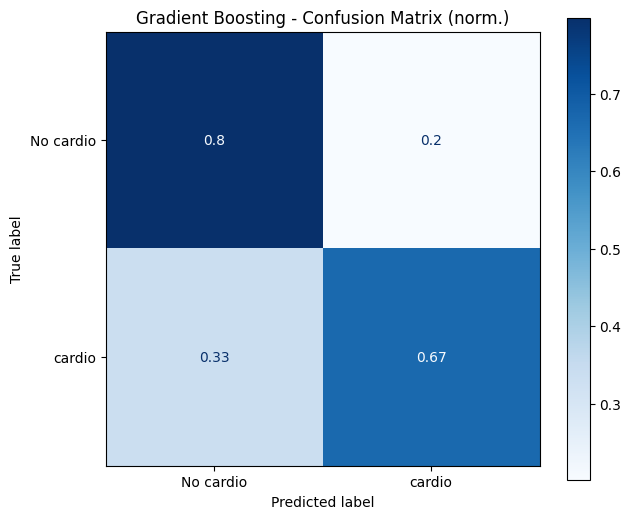

Accuracy Score Test: 0.7326428571428572
Accuracy Score Train: 0.7360476190476191 (as comparison)



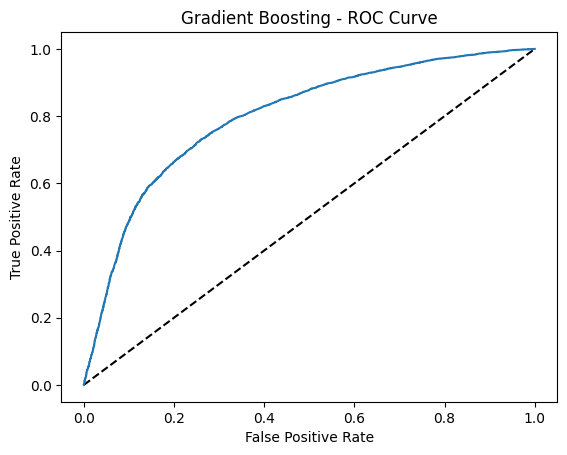

AUC Score (ROC): 0.7991049577616307



In [96]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, clf, y_pred_clf, 'Gradient Boosting')
roc_curve_auc_score(X_test, y_test, y_pred_clf_prob, 'Gradient Boosting')

#Support Vector Machine#

In [84]:
from sklearn.svm import SVC

In [85]:
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train,y_train)

SVC(probability=True)

In [86]:
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

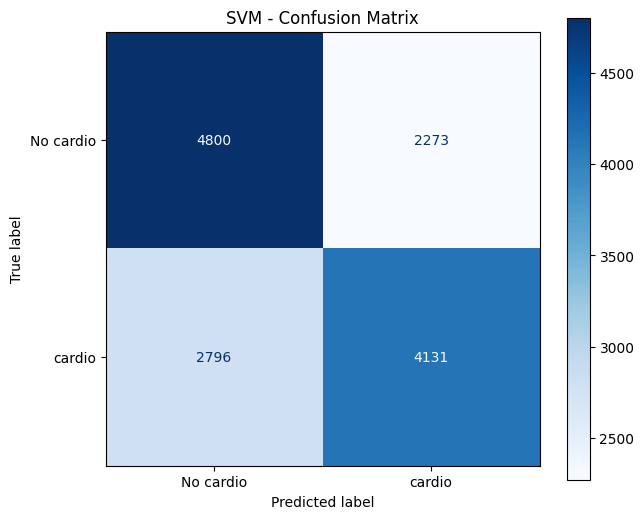

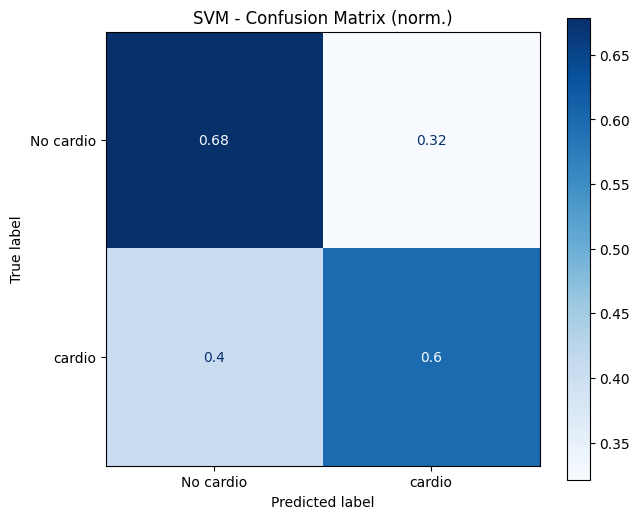

Accuracy Score Test: 0.6379285714285714
Accuracy Score Train: 0.6433809523809524 (as comparison)



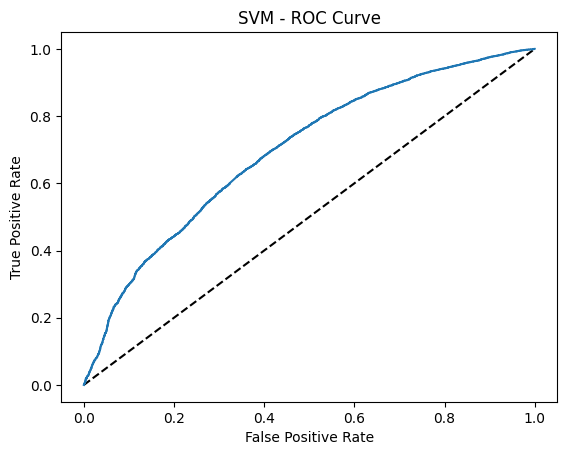

AUC Score (ROC): 0.6962265447195268



In [87]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
#precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

Como vieron en la primera clase, existen diferentes métricar evaluar un clasificador:
- Feature weights: indica las principales características utilizadas por el modelo para generar las predicciones.
- Matriz de confusión: muestra una cuadrícula de predicciones verdaderas y falsas en comparación con los valores reales
- Accuracy: muestra la precisión general del modelo para el conjunto de entrenamiento y el conjunto de prueba
- Curva ROC: muestra la capacidad de diagnóstico de un modelo al reunir la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de predicciones de clase (ejemplo, umbrales de 10%, 50% o 90% resultando una predicción de  churn)
- AUC (para ROC): mide la separabilidad general entre clases del modelo relacionado con la curva ROC
- Precision-Recall-Curve: muestra la capacidad de diagnóstico al comparar la tasa de falsos positivos (FPR) y la tasa de falsos negativos (FNR) para diferentes umbrales de predicciones de clase. Es adecuado para conjuntos de datos con desequilibrios de clase altos (valores negativos sobrerrepresentados), ya que se centra en la precision y recall, que no dependen del número de verdaderos negativos y, por lo tanto, excluye el desequilibrio.
-  F1 score: construye la media armónica de precision y recall y, por lo tanto, mide el compromiso entre ambos.
- AUC (para PRC): mide la separabilidad general entre las clases del modelo en relación con la curva de Precision-Recall

$$ precision = \frac{TP}{TP+FP}$$

$$ recall = \frac{TP}{TP+FN}$$

$$ F_1 = 2\times \frac{precision\times recall}{precision+recall}$$

La métrica sobre la cual evaluaremos los modelos será: Area Under the Receiver Operating Characteristic Curve ([ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)), para tener en cuenta el desbalance que puede existir en los datos. Adicionalmente se recomienda observar la matriz de confusión.

### Responda las siguientes preguntas:

- **Pregunta:**  ¿ Cual fue el ROC AUC para cada modelo?

In [ ]:
#Logistic Regression                   ROC AUC  0.7007422705216246
#Decision Tree Classifier              ROC AUC  0.6381375945967676
#Random Forest Classifier              ROC AUC  0.7734171334674336
#Gradient Boosting Classifier          ROC AUC  0.7991049577616307
#Support Vector Machine                ROC AUC  0.6962265447195268

- **Pregunta:**  ¿Qué modelo obtuvo menor ROC AUC? Analiza su matriz de confusión.

In [ ]:
# El modelo con menor ROC AUC es Decision Tree Classifier

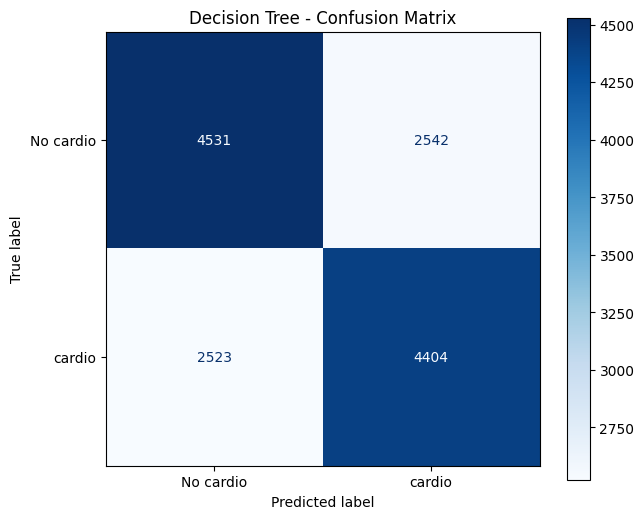

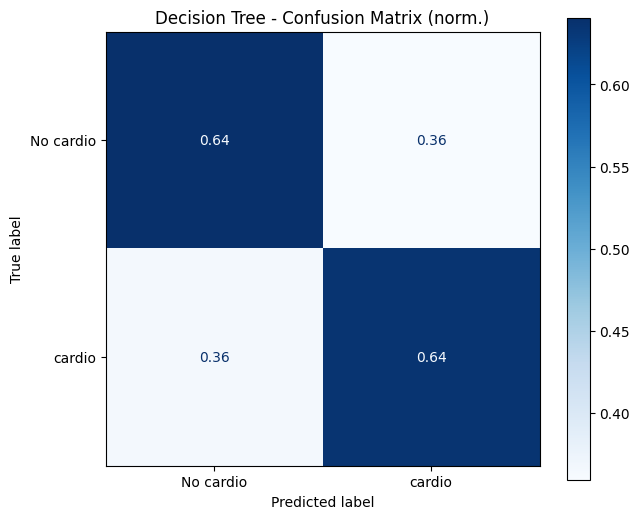

Accuracy Score Test: 0.6382142857142857
Accuracy Score Train: 0.9998571428571429 (as comparison)



In [105]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, dt, y_pred_dt, 'Decision Tree')

Se observa que no es un buen clasificador, por ejemplo clasificó correctamente aquellas personas que enfermarian 4404 (verdaderos positivos) pero se equivocó 2523( falso negativo).
En cambio fueron clasificados aquellos que no enfermarian 4531(verdaderos negativos) pero se equivocó en 2542(falso positivo)

- **Pregunta:** Evalúa el desempeño del mejor modelo en el conjunto de test. Analiza su matriz de confusión.

In [ ]:
#Según el ROC AUC el mejor modelo es el Gradient Boosting Classifier por tener el mayor AUC  0.799

In [106]:
y_pred_clf = clf.predict(X_test)
y_pred_clf_prob = clf.predict_proba(X_test)

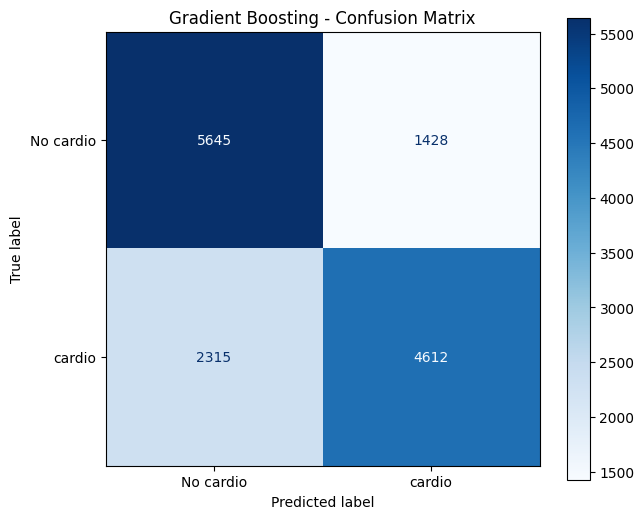

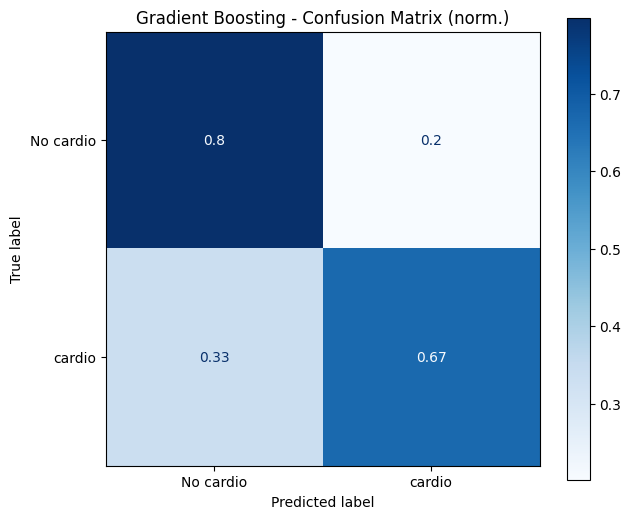

Accuracy Score Test: 0.7326428571428572
Accuracy Score Train: 0.7360476190476191 (as comparison)



In [110]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, clf, y_pred_clf, 'Gradient Boosting')
#roc_curve_auc_score(X_test, y_test, y_pred_clf_prob, 'Gradient Boosting')

Se observa que no es un buen clasificador, por ejemplo clasificó correctamente aquellas personas que enfermarian 4612 (verdaderos positivos) pero se equivocó 2315( falso negativo).
En cambio fueron clasificados aquellos que no enfermarian 5645(verdaderos negativos) pero se equivocó en 1428(falso positivo)



---

